Import the base we need 

In [6]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Make function for spilt data, from source path copy to train and test path

In [7]:
def spilt_training_data(source_path, train_path,test_path,split_ratio=0.8):
    #Get all file path
    files = [os.path.join(source_path, f) for f in os.listdir(source_path) if os.path.isfile(os.path.join(source_path,f))]
    
    #Spilt dataset by split ratio
    training_files, test_files = train_test_split(files, train_size=split_ratio,random_state=66)
    
    #Make sure the path user give to function exist
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)
    
    for f in training_files:
        shutil.copy(f, os.path.join(train_path, os.path.basename(f)))
    for f in test_files:
        shutil.copy(f, os.path.join(test_path, os.path.basename(f)))

Load banana images

In [8]:
base_direction = "/Users/jimpengdemg/Documents/我的项目/Qhack/2025/dataset"

immature_banana = os.path.join(base_direction,"Banana/Immature")
mature_banana = os.path.join(base_direction,"Banana/Mature")
rot_banana = os.path.join(base_direction,"Banana/Rot")

#Set goal path
train_path = "/Users/jimpengdemg/Documents/我的项目/Qhack/2025/dataset/Banana/data_spilt/train"
test_path = "/Users/jimpengdemg/Documents/我的项目/Qhack/2025/dataset/Banana/data_spilt/test"

train_immature_banana = os.path.join(train_path,"Immature")
test_immature_banana = os.path.join(test_path,"Immature")
train_mature_banana = os.path.join(train_path,"Mature")
test_mature_banana = os.path.join(test_path,"Mature")
train_rot_banana = os.path.join(train_path,"Rot")
test_rot_banana = os.path.join(test_path,"Rot")

spilt_training_data(immature_banana,train_immature_banana,test_immature_banana)
spilt_training_data(mature_banana,train_mature_banana,test_mature_banana)
spilt_training_data(rot_banana,train_rot_banana,test_rot_banana)





Preprocess image

In [9]:

#Data augmentation and loading
datagen = ImageDataGenerator(rescale=1.0/255)

training_dataset = datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

testing_dataset = datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 634 images belonging to 3 classes.
Found 159 images belonging to 3 classes.


Define CNN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

Training model

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.4042 - loss: 11.0501 - val_accuracy: 0.8050 - val_loss: 0.8570
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.7709 - loss: 0.7117 - val_accuracy: 0.9119 - val_loss: 0.3390
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9396 - loss: 0.2697 - val_accuracy: 0.9057 - val_loss: 0.2790
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.9390 - loss: 0.2022 - val_accuracy: 0.9245 - val_loss: 0.2230
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.9522 - loss: 0.1403 - val_accuracy: 0.9371 - val_loss: 0.1976
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9726 - loss: 0.1041 - val_accuracy: 0.9308 - val_loss: 0.2270
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.9817 - loss: 0.0755 - val_accuracy: 0.8868 - val_loss: 0.3343
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9807 - loss: 0.0658 - val_accuracy: 0.9497 - val

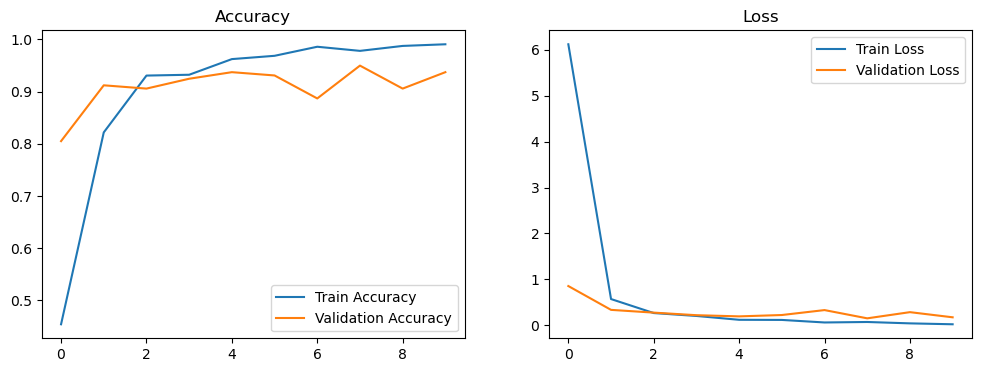

In [11]:
train = model.fit(
    training_dataset,
    validation_data=testing_dataset,
    epochs=10
)

# see test and training ratio
plt.figure(figsize=(12, 4))

#Correct line
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Train Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Incorrext line
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

Evalue model

In [12]:
loss, accuracy = model.evaluate(testing_dataset)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9335 - loss: 0.1606
Validation Accuracy: 93.71%


Test on other image

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

class_names = list(training_dataset.class_indices.keys())

#Load image, transfor image and do predict.
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = prediction.argmax()
    return class_names[class_idx]

test_image_1 = "dataset/Banana/test.jpeg"  
predicted_class = predict_image(test_image_1)
print(f"Predicted Class: {predicted_class}")

test_image_2 = "dataset/Banana/images1.jpeg"  
predicted_class = predict_image(test_image_2)
print(f"Predicted Class: {predicted_class}")

print(class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: Mature
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Immature
['Immature', 'Mature', 'Rot']


Save model

In [18]:
model.save('banana_status_classifier.h5')

If want to load model:


In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# 加载模型
model = load_model('banana_status_classifier.h5')


classes = ['Immature', 'Mature', 'Rot']

#Do preprocess and 
def predict_banana_status(image_path):
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = prediction.argmax()
    return classes[class_idx]


image_path = 'dataset/Banana/images1.jpeg'  
status = predict_banana_status(image_path)
print("Status of banana", status)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Status of banana Immature
